In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import sklearn

In [19]:
data = pd.read_csv("../data/xigua3.0.csv")
data['好瓜'] = data['好瓜'].replace({'是':1,'否':0})
data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,1
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,1
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,1
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,1
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,0
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,0


In [20]:
x = data[['密度','含糖率']]
y = data['好瓜']
x,y

(       密度    含糖率
 0   0.697  0.460
 1   0.774  0.376
 2   0.634  0.264
 3   0.608  0.318
 4   0.556  0.215
 5   0.403  0.237
 6   0.481  0.149
 7   0.437  0.211
 8   0.666  0.091
 9   0.243  0.267
 10  0.245  0.057
 11  0.343  0.099
 12  0.639  0.161
 13  0.657  0.198
 14  0.360  0.370
 15  0.593  0.042
 16  0.719  0.103,
 0     1
 1     1
 2     1
 3     1
 4     1
 5     1
 6     1
 7     1
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 Name: 好瓜, dtype: int64)

In [21]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model = MLPClassifier(max_iter=100000000)
model.fit(x,y)
model.score(x,y)

1.0

In [27]:
x_draw = np.linspace(0, 1, 201)
y_draw = np.linspace(0, 1, 201)
x_draw, y_draw = np.meshgrid(x_draw,y_draw)
disp_input = np.vstack((x_draw.flatten(), y_draw.flatten())).T
disp_predict = model.predict(disp_input)
y_predict = model.predict(x)
y_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

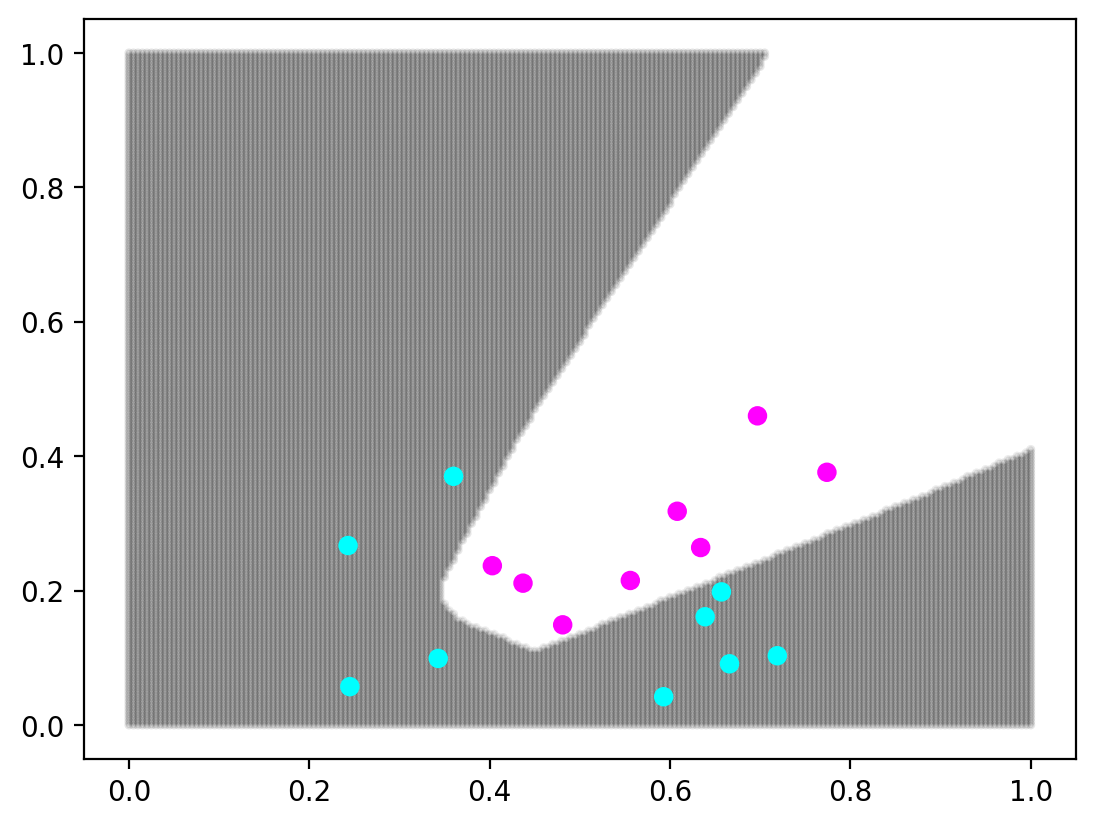

In [28]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1,s=5)
plt.scatter(x['密度'],x['含糖率'], c=y_predict, cmap='cool')
plt.show()

In [30]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model = MLPRegressor(max_iter=100000000)
model.fit(x[['密度']],x['含糖率'])
model.score(x[['密度']],x['含糖率'])

-0.12580466946639612

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\wangy\AppData\Local\Temp\ipykernel_11624\2578982263.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_r_draw, disp_r_predict, cmap='gray', alpha=0.5, s=5)


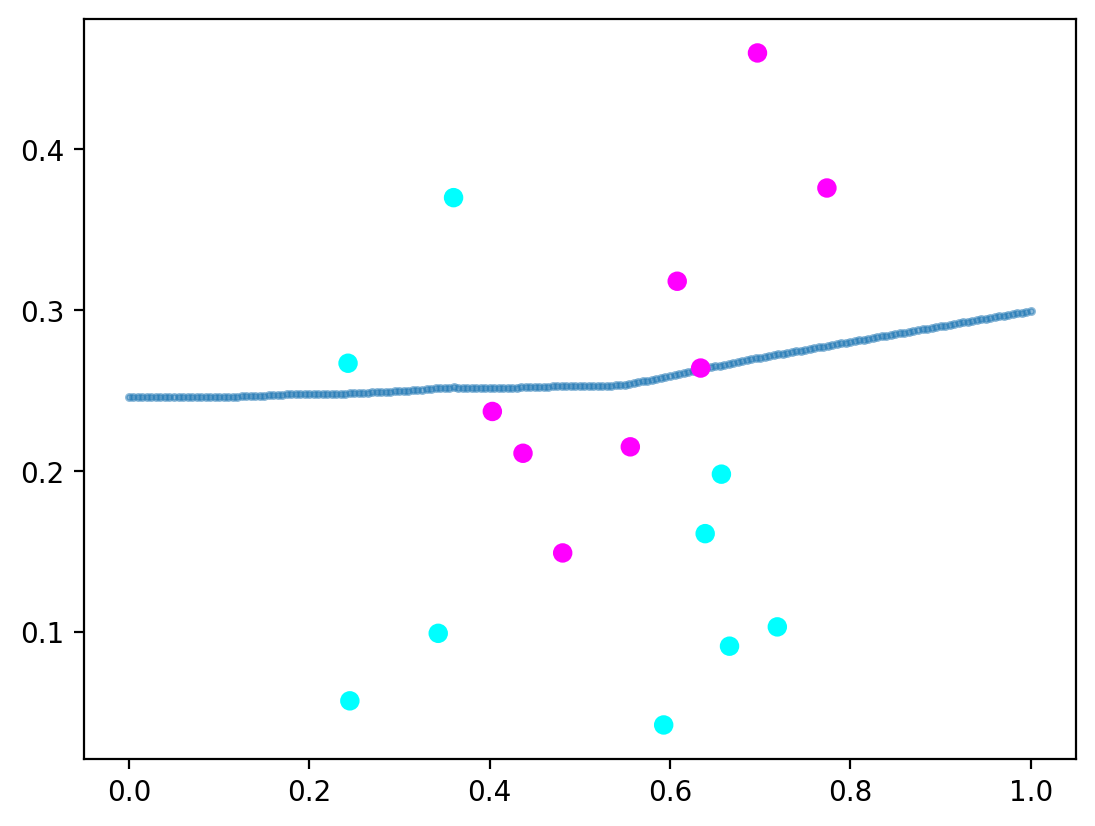

In [37]:
x_r_draw = np.linspace(0, 1, 201).reshape((201,1))
disp_r_predict = model.predict(x_r_draw)
plt.figure(dpi=200)
plt.scatter(x_r_draw, disp_r_predict, cmap='gray', alpha=0.5, s=5)
plt.scatter(x['密度'],x['含糖率'], c=y_predict, cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\wangy\AppData\Local\Temp\ipykernel_11624\746565765.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_r_draw, disp_r_predict, cmap='gray', alpha=0.5, s=5)


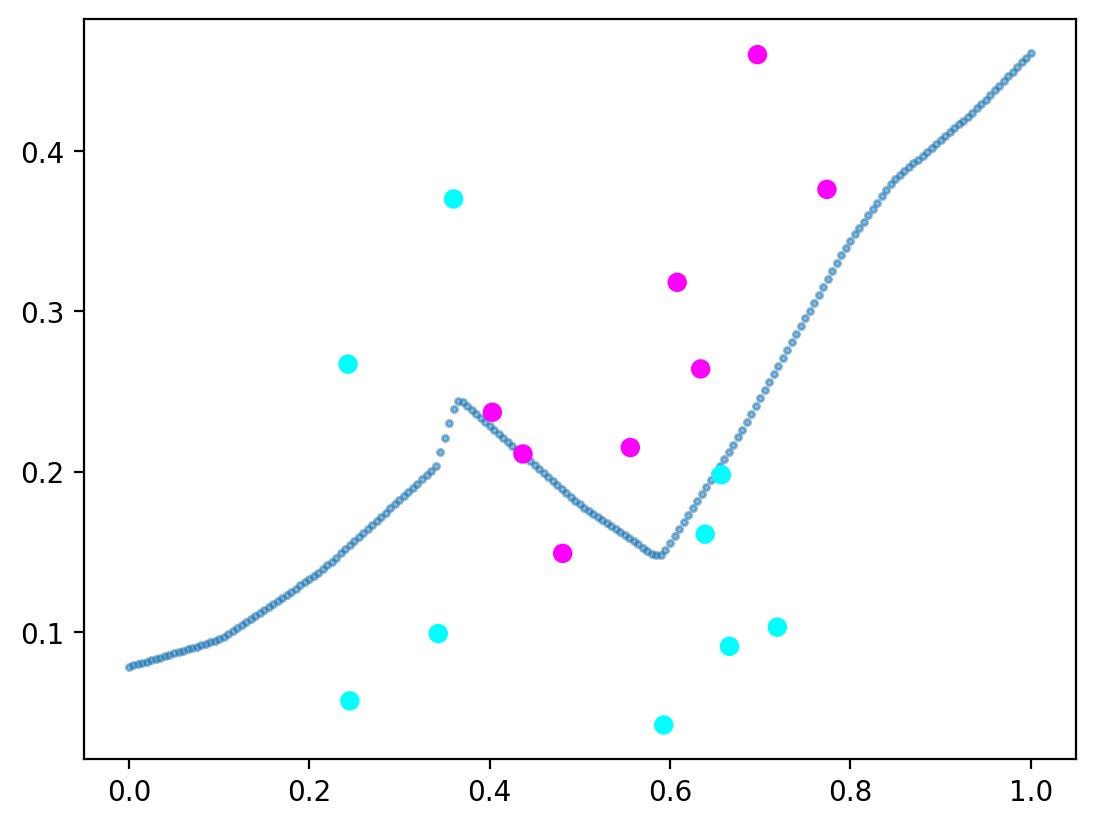

In [48]:
model = MLPRegressor(max_iter=100000000,
                     hidden_layer_sizes=(200,100,50,20,10),
                     tol=1e-8)
model.fit(x[['密度']],x['含糖率'])
disp_r_predict = model.predict(x_r_draw)
plt.figure(dpi=200)
plt.scatter(x_r_draw, disp_r_predict, cmap='gray', alpha=0.5, s=5)
plt.scatter(x['密度'],x['含糖率'], c=y_predict, cmap='cool')
plt.show()

In [49]:
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
ch = fetch_california_housing()
ch

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
ch.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [50]:
ch.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [54]:
ch_x_pd = pd.DataFrame(ch.data, columns=ch.feature_names)
ch_x_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
ch_x = ch_x_pd[['Latitude','Longitude']]
ch_x = (ch_x-ch_x.min())/(ch_x.max()-ch_x.min())
ch_x

,Latitude,Longitude
0,0.567481,0.211155
1,0.565356,0.212151
2,0.564293,0.210159
3,0.564293,0.209163
4,0.564293,0.209163
...,...,...
20635,0.737513,0.324701
20636,0.738576,0.312749
20637,0.732200,0.311753
20638,0.732200,0.301793


In [57]:
ch_y = ch.target
ch_y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [74]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model = MLPRegressor(max_iter=100000000,
                     tol=1e-6,
                     hidden_layer_sizes=(200,100,50))
model.fit(ch_x,ch_y)
model.score(ch_x,ch_y)

0.6001563142855892

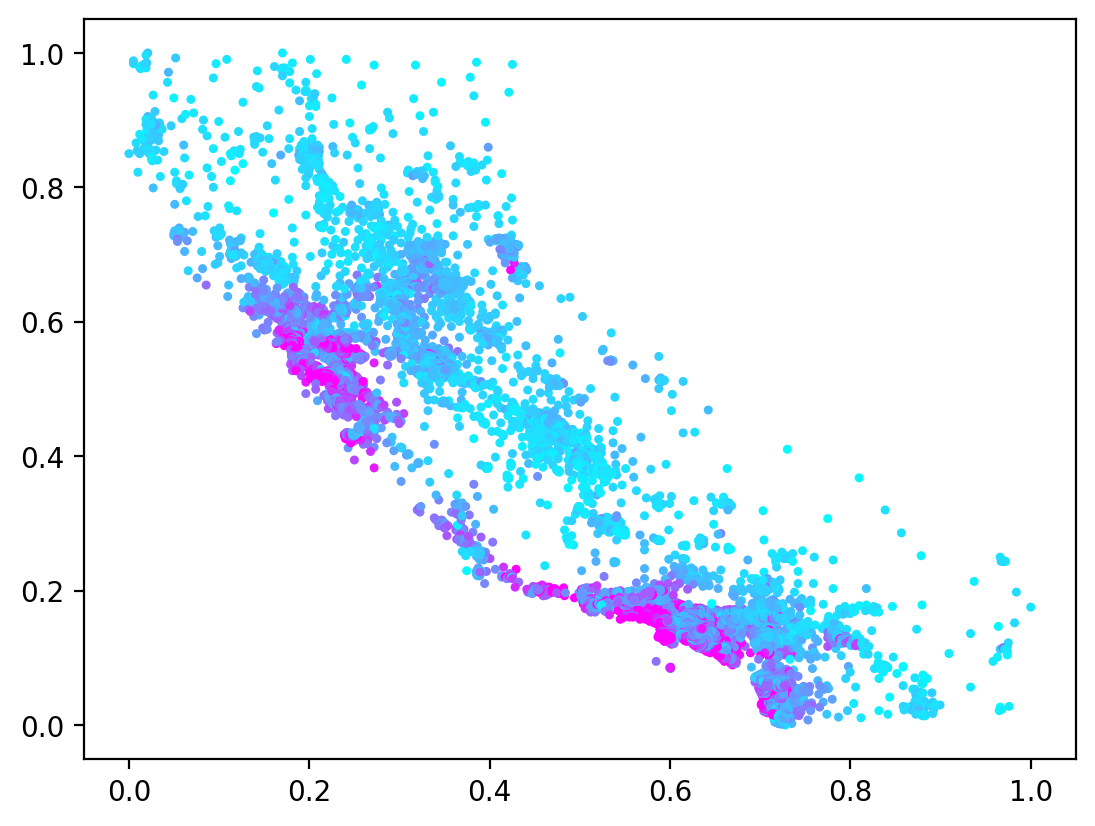

In [75]:
plt.figure(dpi=200)
plt.scatter(ch_x['Longitude'],ch_x['Latitude'], c=ch_y, cmap='cool', s=5)
plt.show()

In [76]:
x_draw = np.linspace(0, 1, 201)
y_draw = np.linspace(0, 1, 201)
x_draw, y_draw = np.meshgrid(x_draw,y_draw)
disp_input = np.vstack((x_draw.flatten(), y_draw.flatten())).T
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([3.56009994, 3.61840092, 3.6767019 , ..., 2.3229371 , 2.32813347,
       2.33332984])

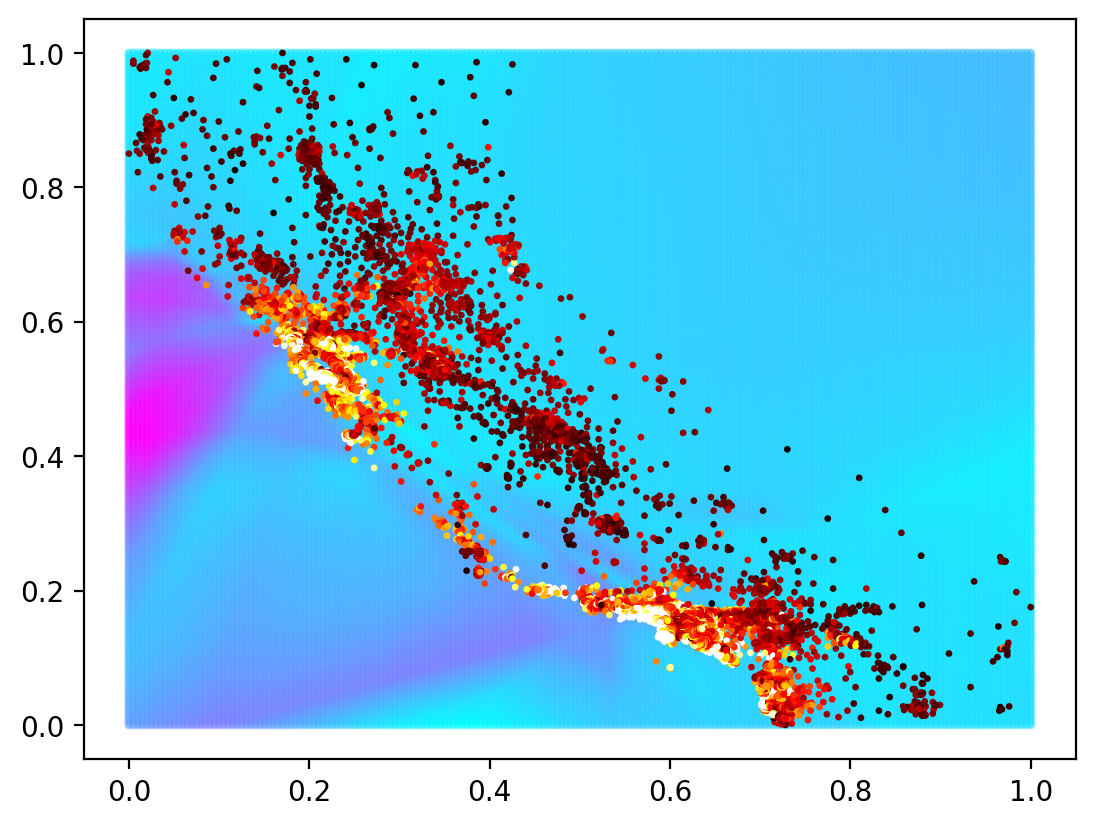

In [79]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='cool', alpha=0.5, s=5)
plt.scatter(ch_x['Longitude'],ch_x['Latitude'], c=ch_y, cmap='hot',s=2)
plt.show()